In [1]:
!pip install kneed


# **¿Qué es K-Means?**

K-Means es un algoritmo de clustering, utilizado para agrupar datos en grupos (o "clústeres") basados en características similares. El objetivo principal del algoritmo es dividir un conjunto de datos en k grupos, donde cada grupo tiene objetos que son más similares entre sí que con los de otros grupos.

## **¿Cuándo utilizar K-Means?**

K-Means es adecuado para:

* Agrupar datos en categorías: Si tienes datos sin etiquetar y quieres encontrar patrones o grupos, K-Means es útil para descubrir esos grupos.

* Datos numéricos: K-Means trabaja mejor con datos numéricos. Si tienes variables categóricas, primero debes convertirlas a variables numéricas

* Datos grandes y bien distribuidos: Es un algoritmo eficiente en términos de tiempo computacional, lo que lo hace adecuado para conjuntos de datos grandes. Sin embargo, debe haber una distribución relativamente uniforme de los datos para obtener buenos resultados.

### **Cuándo NO utilizar K-Means:**

* Datos con forma no esférica: K-Means asume que los grupos tienen una forma esférica. Si los clústeres en los datos tienen una forma compleja o alargada  K-Means no funcionará bien.

* Clústeres de diferentes tamaños: K-Means tiende a dividir los datos en clústeres de tamaños similares. Si los clústeres tienen tamaños muy dispares, el algoritmo puede tener problemas para identificarlos correctamente.

* Datos con ruido y valores atípicos: K-Means es sensible a los valores atípicos, ya que los centroides pueden ser distorsionados por puntos extremos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


# **Información del dataset**
* usuario (el nombre en Twitter)
* “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
* “co” =Conscientiousness – grado de orden, prolijidad, organización
* “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
* “ag” = Agreeableness – grado de empatía con los demás, temperamento
* “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
* Wordcount – Cantidad promedio de palabras usadas en sus tweets
* Categoria – Actividad laboral del usuario (actor, cantante, etc.)

### **Categorias**

* 1. Actor/actriz
* 2. Cantante
* 3. Modelo
* 4. Tv, series
* 5. Radio
* 6. Tecnología
* 6. Deportes
* 7. Politica
* 8. Escritor


In [ ]:
url = 'https://raw.githubusercontent.com/conectivaoficial/analisis-tech/refs/heads/main/analisis.csv'
df = pd.read_csv(url)
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


## **Normalización de los datos**

Normalizar solo las variables cuantitativas

In [ ]:
caracteristicas = ['op', 'co', 'ex', 'ag', 'ne', 'wordcount']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[caracteristicas])

## **Cómo elegir el número de clústeres**

* Método del codo: Se ejecuta el algoritmo para diferentes valores de k y se grafica la "suma de errores cuadráticos dentro del clúster (WCSS)". El valor de k en el que la disminución de WCSS se hace menos pronunciada

* Silhouette Score: Mide qué tan similar es cada punto de datos a su propio clúster en comparación con los demás clústeres. Un valor más alto indica que los clústeres están bien separados.

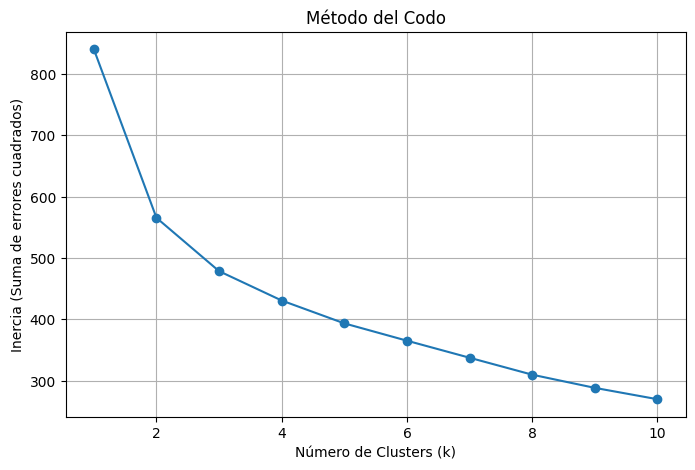

In [ ]:

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

knee = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
#print(f'El codo está en k = {knee.knee}')
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
#plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label=f'Codo en k = {knee.knee}')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (Suma de errores cuadrados)')
plt.grid(True)
plt.show()





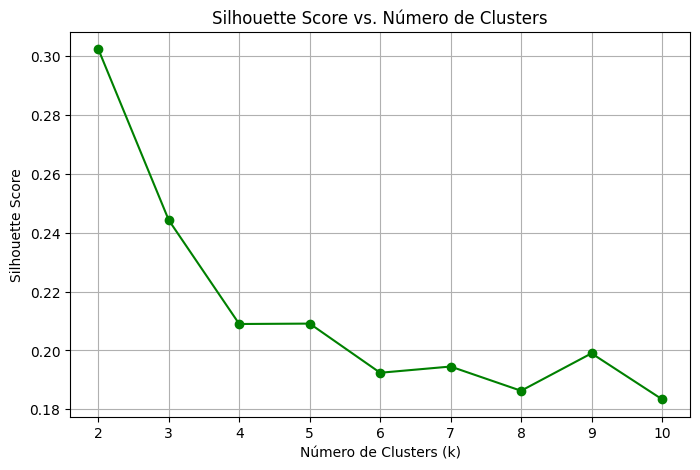

In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [ ]:
# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

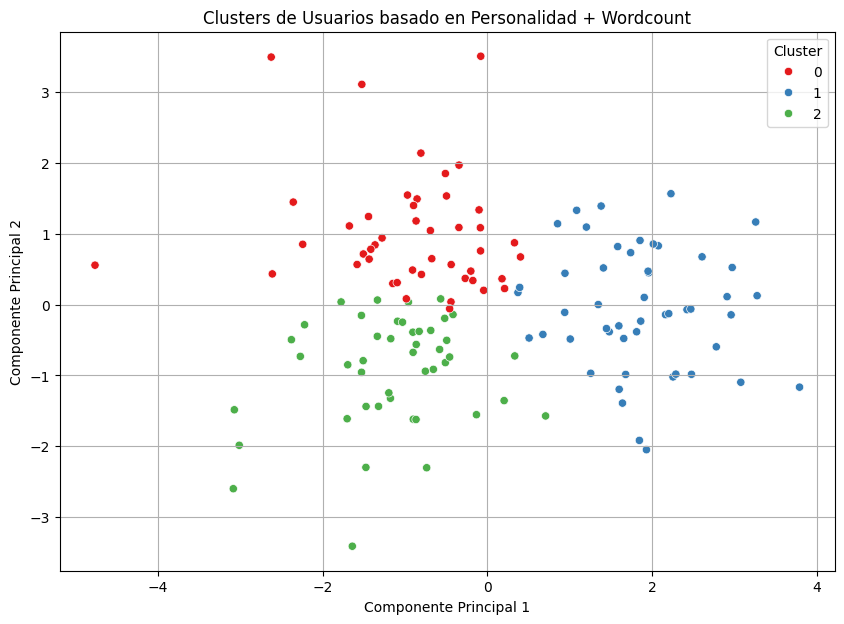

                op         co         ex         ag         ne   wordcount  \
Cluster                                                                      
0        43.878402  27.067624  37.952203  20.180476  10.289254  131.240553   
1        37.182150  19.280610  46.509315  30.890809   7.429321   64.610066   
2        52.986825  22.993898  37.193445  16.798490   6.345138  104.085322   

         categoria  
Cluster             
0         4.844444  
1         5.000000  
2         2.200000  


In [ ]:
#  Reducir dimensiones con PCA (para visualizar)
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
df['PC1'] = components[:, 0]
df['PC2'] = components[:, 1]

# Visualización de los clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1')
plt.title('Clusters de Usuarios basado en Personalidad + Wordcount')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# promedio por cluster
print(df.groupby('Cluster')[caracteristicas + ['categoria']].mean())

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [ ]:
# Ver el número de usuarios por grupo
print(df['Cluster'].value_counts())

# Ver el perfil promedio de cada cluster
print(df.groupby('Cluster')[caracteristicas + ['categoria']].mean())


Cluster
1    50
0    45
2    45
Name: count, dtype: int64
                op         co         ex         ag         ne   wordcount  \
Cluster                                                                      
0        43.878402  27.067624  37.952203  20.180476  10.289254  131.240553   
1        37.182150  19.280610  46.509315  30.890809   7.429321   64.610066   
2        52.986825  22.993898  37.193445  16.798490   6.345138  104.085322   

         categoria  
Cluster             
0         4.844444  
1         5.000000  
2         2.200000  


## **Otra forma de evaliuar**

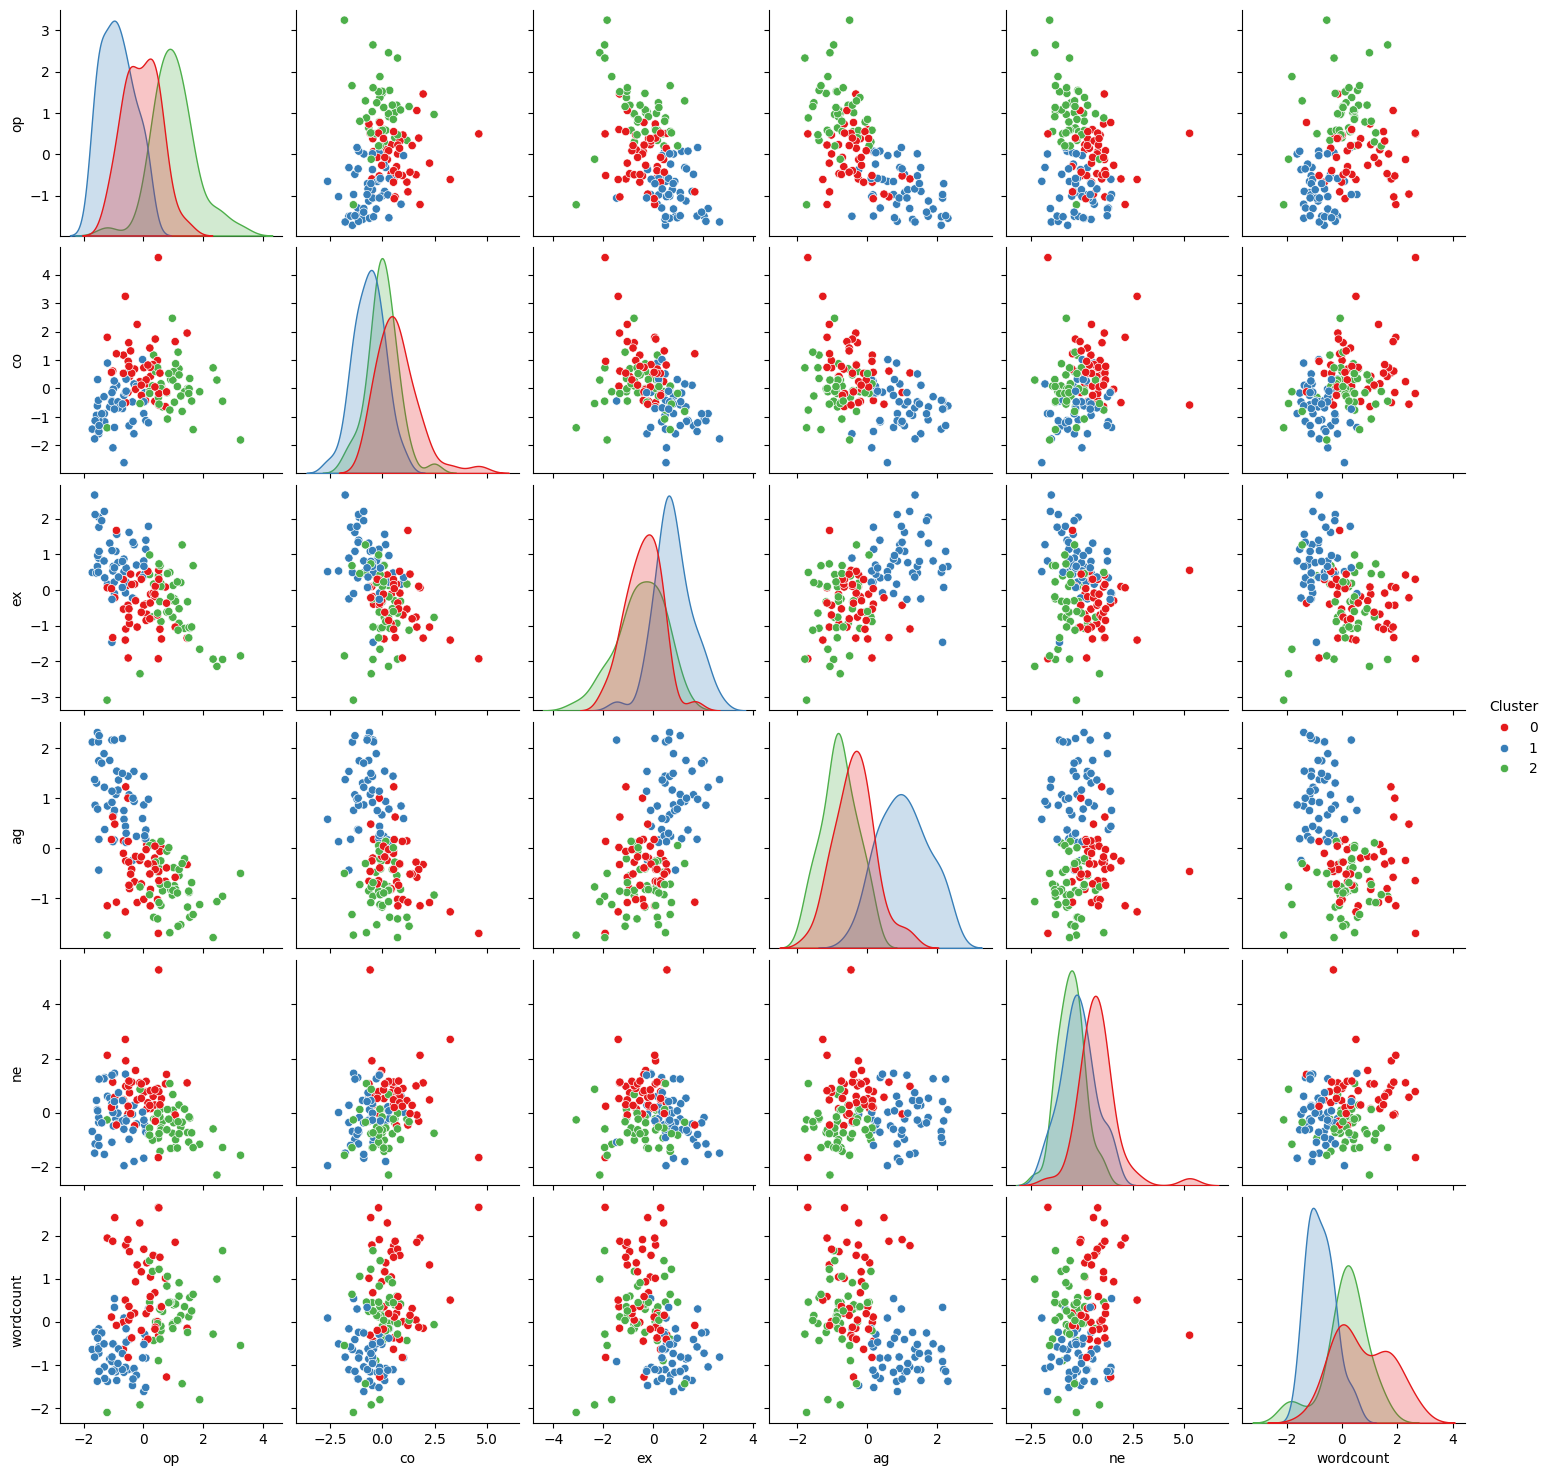

In [ ]:
# Agrega los clusters al DataFrame escalado (para visualizar)
df_scaled_df = pd.DataFrame(df_scaled, columns=caracteristicas)
df_scaled_df['Cluster'] = df['Cluster']

sns.pairplot(df_scaled_df, hue='Cluster', palette='Set1')

In [ ]:
# Analizar el promedio por cluster
print(df.groupby('Cluster')[caracteristicas + ['categoria']].mean())


                op         co         ex         ag         ne   wordcount  \
Cluster                                                                      
0        43.878402  27.067624  37.952203  20.180476  10.289254  131.240553   
1        37.182150  19.280610  46.509315  30.890809   7.429321   64.610066   
2        52.986825  22.993898  37.193445  16.798490   6.345138  104.085322   

         categoria  
Cluster             
0         4.844444  
1         5.000000  
2         2.200000  
